# Reccomender System

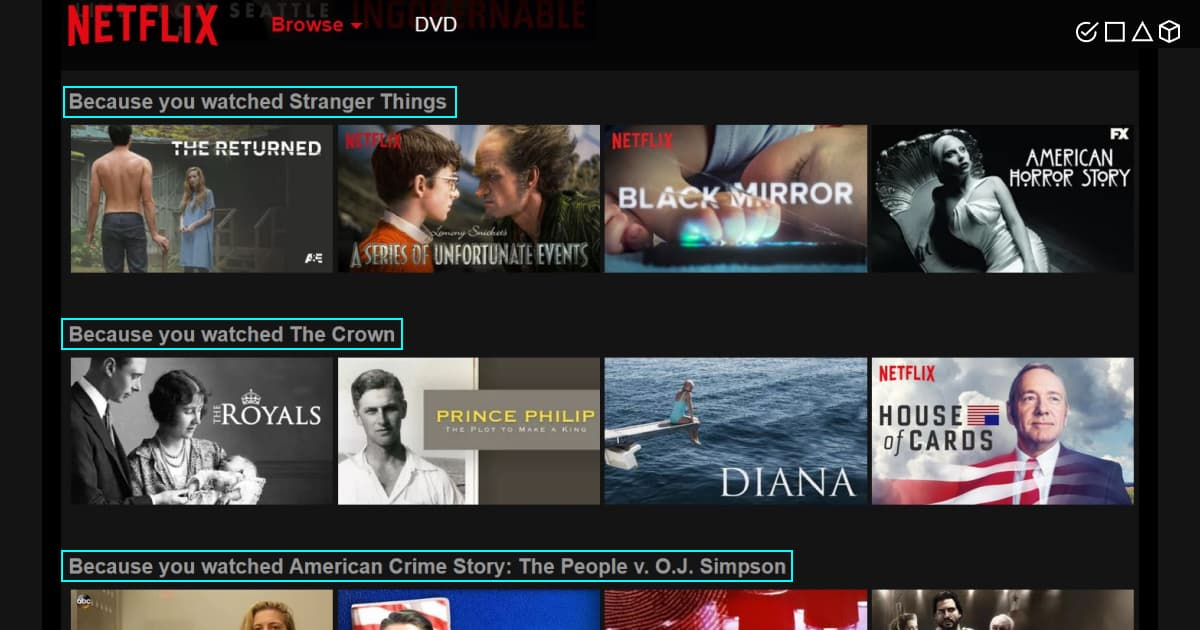

**What is?**
- A system that is capable of predicting the future preference of a set of items for a user and recommend the top items
- Recommender systems help the users to get personalised recommendations

**Why we need it?**
- People have too much options for everything and since the amount of available information is increased a new problem arise as people had a hard time selecting the items they actually want to see. 
- Information overload problem is solved by search engines, but they do not provide personalisation of data. 
  Recommendation engines provide personalisation.
 
- Netflix, YouTube, Tinder and Amazon are all examples of recommender systems in use. 

**How to design it?**

There are different approaches in designing a recommender system but let's focuse on these 3 techniques with a pratical example
* Content based filtering
* Collaborative filtering
* Rating based filtering

## Data $\rightarrow$ MovieLens 20M Dataset 

**The primary goal of movie recommendation systems is to filter and predict only those movies that a corresponding user is most likely to want to watch**

In [60]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings("ignore")
nltk.download(["punkt","stopwords","wordnet"])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dilet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dilet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dilet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [61]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [62]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [95]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


## Content Based Filtering $\rightarrow$ Cosine Similarity

**What?** A filtration strategy for movie recommendation systems, which uses the data provided about the items (movies). This data plays a crucial role here and is extracted from only one user

**How does it work?** The recommendation system analyzes the past preferences of the user concerned, and then it uses this information to try to find similar movies. This information is available in the database (ex. genre). After that, the system provides movie recommendations for the user. That said, the core element in content-based filtering is only the data of only one user that is used to make predictions. 

In [64]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
genres = movies["genres"].apply(lambda x: x.lower().split('|')).apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x]))

### Question: Do you know what lemmatizer do?
 -
 -
 -
 -
 -
 -
 -
 -
 -
 -
 -
 -
 -
 -






*In Lemmatization root word is called Lemma. A lemma is the canonical form, dictionary form, or citation form of a set of words. For example, runs, running, ran are all forms of the word run, therefore **run** is the lemma of all these words.*

In [66]:
movies_dataset = pd.DataFrame(genres)
movies_dataset.index = movies['title']
movies_dataset

,genres
title,
Toy Story (1995),adventure animation child comedy fantasy
Jumanji (1995),adventure child fantasy
Grumpier Old Men (1995),comedy romance
Waiting to Exhale (1995),comedy drama romance
Father of the Bride Part II (1995),comedy
...,...
Cosmic Scrat-tastrophe (2015),animation child comedy
Le Grand Restaurant (1966),comedy
A Very Murray Christmas (2015),comedy


In [68]:
#Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer #
cv = CountVectorizer()
X = cv.fit_transform(movies_dataset["genres"]).toarray()

In [69]:
print("Count Vector : \n",X)
print("\nNote: First row of above count vector: ",X[0])
print("\nColumns Coresponding to above count vector is :\n",cv.get_feature_names_out())

Count Vector : 
 [[0 1 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Note: First row of above count vector:  [0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Columns Coresponding to above count vector is :
 ['action' 'adventure' 'animation' 'child' 'comedy' 'crime' 'documentary'
 'drama' 'fantasy' 'fi' 'film' 'genres' 'horror' 'imax' 'listed' 'musical'
 'mystery' 'no' 'noir' 'romance' 'sci' 'thriller' 'war' 'western']


In [70]:
output = movies.loc[:,['movieId','title']]
output = output.join(pd.DataFrame(X))
output #from 0 to 23 we have the genres

,movieId,title,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10325,146878,Le Grand Restaurant (1966),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10326,148238,A Very Murray Christmas (2015),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10327,148626,The Big Short (2015),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [71]:
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(X) 
similarities

array([[1.        , 0.77459667, 0.31622777, ..., 0.4472136 , 0.        ,
        0.        ],
       [0.77459667, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 1.        , ..., 0.70710678, 0.        ,
        0.        ],
       ...,
       [0.4472136 , 0.        , 0.70710678, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

Above each row of matrix correspond to similarity of a movie with all other movies (row len = 10329)

In [59]:
uid = 18
time = ratings.loc[ratings["userId"]==uid,["movieId","timestamp"]]
latest_movieId_watched_by_user = time.sort_values(by="timestamp",ascending=False)["movieId"].values[0]
movie_index = movies.loc[movies['movieId']==latest_movieId_watched_by_user,["title"]].index[0]
output.loc[output['movieId']==8798,:]

,movieId,title,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
5801,8798,Collateral (2004),1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


Above for user 18 lets recommend movies based on his recent watched movie

In [79]:
movie_index = movies.loc[movies['movieId']==latest_movieId_watched_by_user,["title"]].index[0]
similarity_values = pd.Series(similarities[movie_index])

we need index but we are using id to find the row in similarities matrix

In [14]:
similarity_values.sort_values(ascending=False)

2605     1.0
979      1.0
8297     1.0
309      1.0
6387     1.0
        ... 
4851     0.0
4842     0.0
4840     0.0
4836     0.0
10328    0.0
Length: 10329, dtype: float64

We converted list into series in order to preserve the actual indexes of dataset even after sorting

In [15]:
similar_movie_indexes = list(similarity_values.sort_values(ascending=False).index)
similar_movie_indexes[:10]

[2605, 979, 8297, 309, 6387, 6378, 8061, 6864, 8317, 2303]

In [16]:
#Remove the already watched movie from index list
similar_movie_indexes.remove(movie_index)

In [17]:
def get_movie_by_index(idx):
    return movies_dataset.index[idx]
def get_movie_by_id(mv_id):
    return movies.loc[movies['movieId']==mv_id,['title']].values[0][0]
get_movie_by_index(8899)

'Background to Danger (1943)'

In [18]:
print("Since u watched --->",get_movie_by_id(latest_movieId_watched_by_user),"<--- We recommend you")
for i in range(15):
    print(get_movie_by_index(similar_movie_indexes[i]))

Since u watched ---> Collateral (2004) <--- We recommend you
Hard-Boiled (Lat sau san taam) (1992)
Killer, The (Die xue shuang xiong) (1989)
Boondock Saints II: All Saints Day, The (2009)
Clear and Present Danger (1994)
Memory of a Killer, The (Zaak Alzheimer, De) (2003)
Infernal Affairs 2 (Mou gaan dou II) (2003)
Baader Meinhof Komplex, Der (2008)
Munich (2005)
Ninja Assassin (2009)
Double Jeopardy (1999)
Mesrine: Killer Instinct (L'instinct de mort) (2008)
Wild Card (2015)
Chained Heat (1983)
Face/Off (1997)
Lady Snowblood (Shurayukihime) (1973)


## Collaborative Filtering $\rightarrow$ Similar Users Based

**What?** This filtering strategy is based on the combination of the relevant user’s and other users’ behaviors. The system compares and contrasts these behaviors for the most optimal results. It’s a collaboration of the multiple users’ film preferences and behaviors. 

**How does it work?**
The core element in this movie recommendation system and the ML algorithm it’s built on is the history of all users in the database. Basically, collaborative filtering is based on the interaction of all users in the system with the items (movies).
So the idea is to look for similar patterns in movie preferences in the target user and other users in the database. 

In [80]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [81]:
dataset = movies.merge(ratings, on='movieId')
dataset = dataset.loc[:,["userId","movieId","title","genres","rating"]]
df_ratings = dataset.loc[:,["title","rating"]].groupby("title").mean()
genres = dataset["genres"]

In [82]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
li = []
for i in range(len(genres)):
    temp = genres[i].split("|")
    for j in range(len(temp)):
        temp[j] = lemmatizer.lemmatize(temp[j])
    li.append(" ".join(temp))

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(li).toarray()
genres = pd.DataFrame(X,columns=cv.get_feature_names_out ())
dataset = dataset.iloc[:,:-2]
new_dataset = dataset.join(genres)

In [84]:
new_dataset

,userId,movieId,title,action,adventure,animation,children,comedy,crime,documentary,...,listed,musical,mystery,no,noir,romance,sci,thriller,war,western
0,2,1,Toy Story (1995),0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,Toy Story (1995),0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,1,Toy Story (1995),0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,1,Toy Story (1995),0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14,1,Toy Story (1995),0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105334,475,148238,A Very Murray Christmas (2015),0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
105335,458,148626,The Big Short (2015),0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105336,576,148626,The Big Short (2015),0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105337,668,148626,The Big Short (2015),0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
users = new_dataset.drop(["movieId","title"],axis=1)
users_moviemat = users.groupby("userId").sum()
X = users_moviemat.iloc[:,:].values
users_moviemat

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,fi,...,listed,musical,mystery,no,noir,romance,sci,thriller,war,western
userId,,,,,,,,,,,,,,,,,,,,,
1,46,31,2,3,31,31,1,45,8,25,...,0,1,13,0,2,16,25,43,10,1
2,9,10,2,3,11,3,0,11,4,5,...,0,2,2,0,0,8,5,12,0,0
3,13,9,2,5,35,12,1,36,5,3,...,0,3,4,0,0,22,3,21,3,3
4,14,17,4,6,46,18,0,76,8,3,...,0,6,10,0,6,37,3,18,16,5
5,17,22,21,21,45,6,0,19,16,6,...,0,11,3,0,0,21,6,11,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,36,30,2,3,26,9,1,16,8,22,...,0,6,5,0,0,20,22,22,7,0
665,73,51,7,16,60,61,0,128,25,25,...,0,5,24,0,0,31,25,102,17,5
666,34,27,10,19,83,36,1,101,19,30,...,0,2,20,0,7,26,30,51,8,4


In the above matrix each row indicates user with id 1 watched 46 action movies, 31 adventure movies, 2 animation movies …

Now we need to find the similar user, who almost watch similar ratios of movies.

Let’s train a classification model on this, that uses some technique based on nearest data points to classify the data point. The data point that is closer to our observation is the required datapoint(Similar User).

**Obs**:
The principle behind *nearest neighbor* methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. 
NearestNeighbors sklearn implements unsupervised nearest neighbors learning. It acts as a uniform interface to three different nearest neighbors algorithms: BallTree, KDTree, and a brute-force algorithm based on routines in sklearn.metrics.pairwise. The choice of neighbors search algorithm is controlled through the keyword 'algorithm', which must be one of ['auto', 'ball_tree', 'kd_tree', 'brute']. When the default value 'auto' is passed, the algorithm attempts to determine the best approach from the training data.

more about the choice https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms

In [88]:
from sklearn.neighbors import NearestNeighbors
classifier = NearestNeighbors(algorithm='auto')
classifier.fit(X)

NearestNeighbors()

In [89]:
uid = int(input("Enter User Id "))
li = classifier.kneighbors([X[uid-1]],n_neighbors=5,return_distance=False)
li

Enter User Id 8


array([[  7, 259, 578, 565,   5]], dtype=int64)

Once we found the similar user, next step is to find movies which the similar user has seen and current user has not seen.

In [92]:
current_user = new_dataset.loc[new_dataset["userId"]==li[0][0],:]["title"].values
similar_user = new_dataset.loc[new_dataset["userId"]==li[0][1],:]["title"].values
movies_list = [movie for movie in similar_user if movie not in current_user]
for i in range(len(movies_list)):
    movies_list[i] = (movies_list[i], df_ratings['rating'][df_ratings.index == movies_list[i]].values[0])
print("Recommended Movies are for user",uid,':')
movies_list

Recommended Movies are for user 8 :


[('Usual Suspects, The (1995)', 4.328947368421052),
 ('Mighty Aphrodite (1995)', 3.581081081081081),
 ('Johnny Mnemonic (1995)', 2.453846153846154),
 ('Living in Oblivion (1995)', 4.111111111111111),
 ('Crow, The (1994)', 3.4382716049382718),
 ('Englishman Who Went Up a Hill But Came Down a Mountain, The (1995)',
  3.3225806451612905),
 ('Rear Window (1954)', 4.331081081081081),
 ('Trees Lounge (1996)', 3.4166666666666665),
 ('Breaking the Waves (1996)', 3.5),
 ('Grosse Pointe Blank (1997)', 3.6267605633802815),
 ('Gattaca (1997)', 3.8876404494382024),
 ('Dark City (1998)', 3.9661016949152543),
 ('Live Flesh (Carne trémula) (1997)', 2.8),
 ('Back to the Future Part II (1989)', 3.4362745098039214),
 ('Pleasantville (1998)', 3.55),
 ('Following (1998)', 4.045454545454546),
 ('Barry Lyndon (1975)', 3.8076923076923075),
 ('Road Warrior, The (Mad Max 2) (1981)', 3.4615384615384617),
 ('Wonderland (1999)', 4.5),
 ('Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)',
  3.973214285714285

## Rating based filtering $\rightarrow$ Correlation 

**What?** Based on higher ratings and number of reviews movies can be recommended. 

**How does it work?** Here Correlation comes into act. We compare the one movie ratings given by all users with the another movie ratings given by all users, thus we find some correlation between movies from all user’s perspective. So the basic concept here is to look for similar items (movies) that target users rate or interact with. 

In [27]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
dataset = ratings.merge(movies, on='movieId')
df = dataset.groupby("title")['rating'].mean()
df1 = dataset.groupby("title")['rating'].count()
dataset_based_on_ratings = pd.DataFrame({"rating":df,"number of ratings":df1})
dataset_based_on_ratings

,rating,number of ratings
title,,
'71 (2014),3.500000,1
'Hellboy': The Seeds of Creation (2004),3.000000,1
'Round Midnight (1986),2.500000,1
'Til There Was You (1997),4.000000,3
"'burbs, The (1989)",3.125000,20
...,...,...
loudQUIETloud: A Film About the Pixies (2006),4.500000,1
xXx (2002),2.958333,24
xXx: State of the Union (2005),2.071429,7


In [28]:
df = dataset.loc[:,["userId","rating","title"]]
users_movie_matrix = pd.pivot_table(df,columns='title',index='userId',values='rating') 
users_movie_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN


The above code have create a table where the rows are userIds and the columns represent the movies. The values of the matrix represent the rating for each movie by each user.

In [29]:
movie_watched = users_movie_matrix["Jurassic Park (1993)"]
y = users_movie_matrix["Silence of the Lambs, The (1991)"]

In [30]:
li = []
for i in range(len(users_movie_matrix.columns)):
    li.append(movie_watched.corr(users_movie_matrix.iloc[:,i]))
li = pd.Series(li)

In [31]:
df = pd.DataFrame({"title": users_movie_matrix.columns,"Correlation": li,
                   "number of ratings" : dataset_based_on_ratings["number of ratings"].values})
df

,title,Correlation,number of ratings
0,'71 (2014),NaN,1
1,'Hellboy': The Seeds of Creation (2004),NaN,1
2,'Round Midnight (1986),NaN,1
3,'Til There Was You (1997),1.000000,3
4,"'burbs, The (1989)",0.635632,20
...,...,...,...
10318,loudQUIETloud: A Film About the Pixies (2006),NaN,1
10319,xXx (2002),0.371814,24
10320,xXx: State of the Union (2005),0.760886,7
10321,¡Three Amigos! (1986),0.637737,40


Sort the dataset respect to the correlation column and remove the rows with *NaN* values. The dataset looks like

In [32]:
df.dropna(inplace=True)
df.sort_values(by=["Correlation"],ascending=False)

,title,Correlation,number of ratings
1682,"Castle, The (1997)",1.0,7
4123,Hero at Large (1980),1.0,2
8487,Speechless (1994),1.0,6
8483,"Specials, The (2000)",1.0,2
8420,Sonatine (Sonachine) (1993),1.0,5
...,...,...,...
5044,Killshot (2008),-1.0,2
3665,Gloria (1999),-1.0,3
3647,"Girlfriend Experience, The (2009)",-1.0,2
5074,King of the Hill (1993),-1.0,2


In [33]:
movie_watched = users_movie_matrix[input("Enter a Movie Name SVP ").strip()]
print("loading.....")
li = []
for i in range(len(users_movie_matrix.columns)):
    li.append(movie_watched.corr(users_movie_matrix.iloc[:,i]))
li = pd.Series(li)
df = pd.DataFrame({"title": users_movie_matrix.columns,"Correlation": li,
                   "number of ratings" : dataset_based_on_ratings["number of ratings"].values})
df[df["number of ratings"] >= 50].sort_values(by=["Correlation","number of ratings"],ascending=False).iloc[1:6,:]

Enter a Movie Name SVP Toy Story (1995)
loading.....


,title,Correlation,number of ratings
9814,Wallace & Gromit: A Close Shave (1995),0.725063,55
9381,Toy Story 2 (1999),0.709677,104
1912,"Client, The (1994)",0.695989,65
6795,"Others, The (2001)",0.681520,53
7688,Robin Hood: Men in Tights (1993),0.655574,69


# Now it's your turn : [challenge](https://www.kaggle.com/datasets/netflix-inc/netflix-prize-data?datasetId=1636&sortBy=voteCount&language=Python) on [Netflix Prize](https://en.wikipedia.org/wiki/Netflix_Prize)